In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5]

(50000,)

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

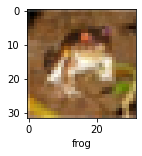

In [10]:
plot_sample(x_train,y_train,0)

In [11]:
x_train=x_train/255

In [12]:
x_test=x_test/255

In [13]:
cnn=Sequential([
    #cnn layers
    Conv2D(filters=32,kernel_size=(3,3),activation=('relu'),input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters=32,kernel_size=(3,3),activation=('relu')),
    MaxPooling2D((2,2)),
    #dense layers
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='sigmoid')
])

In [14]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 33s 19ms/step - loss: 1.5290 - accuracy: 0.4503
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1832 - accuracy: 0.5822
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0518 - accuracy: 0.6315
Epoch 4/5
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9711 - accuracy: 0.6594
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9111 - accuracy: 0.6827


In [39]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9640 - accuracy: 0.6674


[0.9639776349067688, 0.6674000024795532]

In [45]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [46]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

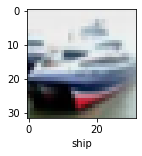

In [47]:
plot_sample(x_test,y_test,1)

In [48]:
y_pred=cnn.predict(x_test)

In [49]:
y_pred[:5]

array([[2.91732252e-02, 1.58864558e-02, 9.14606452e-02, 9.57776427e-01,
        6.78144395e-02, 7.34396815e-01, 6.59934163e-01, 9.06166434e-03,
        7.73851335e-01, 6.12461567e-03],
       [9.37810063e-01, 6.28584385e-01, 2.37857401e-02, 6.17367029e-03,
        3.06001306e-03, 4.05231185e-05, 2.47567892e-04, 2.03093886e-03,
        9.99871790e-01, 8.46738160e-01],
       [4.70261484e-01, 4.62815464e-01, 6.10667765e-02, 1.43026382e-01,
        8.32438171e-02, 7.74574280e-03, 1.27483606e-02, 1.86898410e-02,
        9.93303418e-01, 5.19149482e-01],
       [9.61138606e-01, 1.75566614e-01, 4.90553826e-01, 9.14818048e-02,
        2.27778256e-01, 2.64561176e-03, 1.13125145e-02, 2.43337154e-02,
        9.56514180e-01, 4.27527726e-02],
       [1.02915285e-04, 2.29322910e-03, 4.75644618e-01, 8.47193837e-01,
        9.77992773e-01, 5.74857116e-01, 9.74959373e-01, 4.47010994e-03,
        2.50354409e-03, 6.90131201e-05]], dtype=float32)

In [53]:
np.argmax(y_pred)

61591

In [55]:
y_classes=[np.argmax(elements)for elements in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [56]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

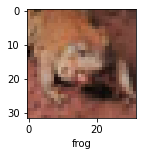

In [65]:
plot_sample(x_test,y_test,5)

In [66]:
classes[y_classes[5]]

'frog'

In [64]:
from sklearn.metrics import classification_report
print('Classification report: \n',classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.64      0.70      1000
           1       0.82      0.72      0.77      1000
           2       0.67      0.44      0.53      1000
           3       0.50      0.49      0.49      1000
           4       0.57      0.69      0.62      1000
           5       0.61      0.56      0.58      1000
           6       0.74      0.76      0.75      1000
           7       0.75      0.71      0.73      1000
           8       0.60      0.90      0.72      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000

